# CSCI 5454: Assignment 4

Your Name: Akash Iyengar


Collaborated With:


## Problem 1 (10 points)

Consider the program below:

`def findMinimum(a):
     n = len(a)
     minSoFar =  math.inf
     for i in range(n):
         if (a[i] < minSoFar):
            minSoFar = a[i] # <-- X
     return minSoFar`
     
 If $a$ is a random array of numbers $1, \ldots, n$ such that any of the $n!$ permutations is equally probable. What is the expected number of times the variable `minSoFar` is updated in the for loop (i.e, the statement marked "X" is executed)? Your answer must be a function of $n$, asymptotic notation is fine and you must show the steps/justification that you used to arrive at your answer clearly and concisely.

> 1. Consider f(n) to be the average number of updations of minSoFar<br/>
> 2. Assuming the last element is not the smallest, f(n) = f(n-1)<br/>
> 3. Assuming the last element is the smallest, then f(n) = f(n-1) + 1.<br/>
> 4. If the last number is smallest with probability 1/n, and not the smallest with probability (n-1)/n<br/>
> 5. The Equation can be given as:<br/>
$$ f(n) = (n-1)/n*f(n-1) + 1/n*(f(n-1) + 1)$$
> 6. Expanding the equation we get.
$$ f(n) = f(n-1) + 1/n$$

$$ \begin{array}{rclcl}
 f(1) = 1\\
 f(2) = 0 + 1/2\\
 f(3) = 0 + 1/2 + 1/3\\
 f(4) = 0 + 1/2 + 1/3 + 1/4\\
\end{array}$$.

> since its a harmonic series,its O(logn)





## Problem 2A (10 points)

We will now consider a scheme to randomly permute an array of size $n$. You are allowed to generate a single random bit at a time using the `random.getrandbits(1)` function. Write a function `shuffleArray` that will shuffle an input array of $n$ integers so that any permutation is equally probable.

- __Input:__ original list.
- __Return:__ shuffled list.

You __should not__ modify the original array.  You are __forbidden__ to use any random number generator other than `random.getrandbits(1)`.


In [11]:
import random
from random import getrandbits
def shuffleArray(a):
    y=len(a)
    for i in range(y-1,0,-1):
        j= random.getrandbits(1)
        a[i],a[j] = a[j],a[i]
    return a

Chi-Squared value = 16.706
Chi-Squared value = 15.98
Chi-Squared value = 8.162


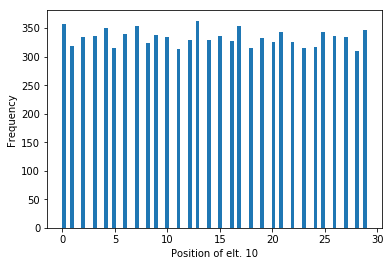

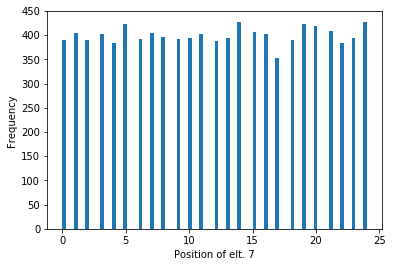

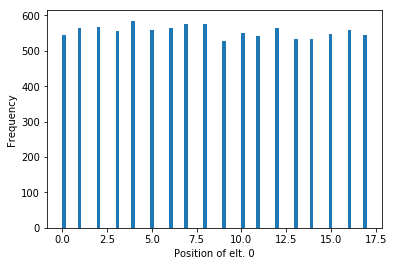

In [12]:
%matplotlib inline
## Begin statistical tests
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import chisquare

def placementTest(n, nTrials, elt):
    a = list(range(n))
    where = []
    for i in range(nTrials):
        b = shuffleArray(a)
        # find where element n/2 ended up
        j = b.index(elt)
        where.append(j)
        
    plt.figure("Position of elt. %d"%(elt))
    plt.hist(where, bins=80)
    plt.xlabel('Position of elt. %d'%(elt))
    plt.ylabel('Frequency')
    # TODO: Implement a xi-squared test 
    frequency = {}
    for index in where:
        frequency[index] = frequency.get(index, 0) + 1
    exp_frequency = nTrials/n
    chi_squared = 0
    for index in frequency:
        chi_squared += (frequency[index] - exp_frequency)**2/exp_frequency
    print("Chi-Squared value =", round(chi_squared,3))
    # for now let us eyeball the histograms.
    # the histograms must be near uniform. 

placementTest(30, 10000, 10)
placementTest(25, 10000, 7)
placementTest(18, 10000, 0)
       
##  End statistical tests

## Problem 2B  (5 Points)

Analyze the expected running time of your algorithm in 2(A) and expected number of random bits used?

> The expected running time of the algorithm  is $O(n)$<br/>
> The algorithm uses $(n-1)$ random bits<br/>
> so the expected number of random bits can be given by<br/>
     E(random)= 2<sup>(n-1)</sup>


## Problem 3  (20 points)

We insert keys from $1, \ldots, n$ in a random order into a binary search tree. Throughout this problem,
node $i$ refers to a node with key $i$. The _priority_ of a node is the rank order in which it is inserted
into the tree with the root having priority $1$ and the very last node to be inserted having priority $n$.

In class, we showed that a node $i$ is the ancestor of a node $j$ if and only if $i$ has the lowest priority amongst all nodes $\{ i, \ldots, j\}$ (or $\{ j, \ldots, i\}$ if $j < i$).

(A) State and prove a condition for node $k$ to be a leaf in the tree.  For the purposes of this problem, a node is a leaf if both its children are NIL. 

(B) What is the probability that node $k$ is a leaf? __Hint:__ Your answer should analyze nodes $1, n$ separately from nodes $2, \ldots, n-1$.

(C) Calculate the expected number of leaf nodes. Your answer should be exact: asymptotic notations or bounds are not acceptable.


**Answer (A)**<br/>
**Statement for the condition** 
> A node K is considered to be a leaf node if and only if  it is inserted after bot its left and right neighbors. The permutations of the neighbours are eqully likely and only two of them have the property that node k is the last one inserted.<br/>
> Uniform random permutation is given by<br/>
$$(x_1,....x_n)$$<br/>
> With Keys we can write it as :<br/>
$$((x_1,1),....,(x_n,n))$$<br/>
> Inverse permutation is defined as:<br/>
$$((1,Y1),..,(n,Yn))$$<br/>
> using ancestor - descendant relationship k is a leaf if:<br/>
$$Y_k=max(Y_{k−1},Y_k,Y_{k+1})$$
> the priority of k should be less than k-1 and k+1

**Answer (B)**<br/>
> To find the probablity of node k to be a leaf.<br/>
> The probablity of node k being leaf node can be of two ways:<br/>
$$ Pr(K is Leaf) =\frac{1}{3} $$ for nodes 2,.....,n-1<br/>
$$ Pr(K is Leaf) =\frac{1}{2} $$ for the first and the last node i.e 1 and n<br/>

**Answer (C)**<br/>
> The expected number of leaf node can be given by

>>$ln$ = E[Number of leaves in random search tree for S=[n]] Where s is a tree when n nodes<br/>

>>$ = \sum_{i=1}^{n} $ E[Number of leaves in random search tree for S=[n]|root=i].Pr[root=i]<br/>

>>$=\sum_{i=1}^{n} (l_{i-1} + l_{n-i}) \times 1/n$<br/>

>>$ =\frac {2}{n} \times \sum_{i=0}^{n-1} l_i$<br/>

>>$ Hence, for n ≥ 3:$<br/>

>>$\frac{2}{n}l_n=\sum_{i=0}^{n-1} l_i$<br/>

>>$ \frac{2}{n-1}l_{n-1}=\sum_{i=0}^{n-2} l_i$<br/>

>> Subtract both the equations<br/>

>> $\frac{2}{n}l_n-\frac{2}{n-1}l_{n-1}=l_{n-1}$<br/>

>>$ \frac{2}{n}l_n=\frac{n+1}{n-1}l_{n-1}=\frac{(n+1).n}{3.2}$<br/>

>>$ Hence$<br/>

>>$l_n=\frac{n+1}{3}$<br/>



## Problem 4 (5 points)

We wish to rapidly find the $k^{th}$ smallest element in a skip list. Describe what extra information you would store in each node of the list and how you would find the $k^{th}$ smallest element in a skip list using this information.  What is the running time of your search in the worst case.


>1. The additional information we would store in each node of the list can be represented by variable askip(p)<br/>
>2. The variable contains information about number of nodes in each level from leftmost and uppermost node of the level to the next leftmost and uppermost node in subsequent levels.<br/>
>3. We need to store the information about the number of nodes skipped in every level for every node.<br/>
>4. It helps in efficiently running the algorithm.<br/>
> The worst case running time is $$O(n)$$